# Sample random walk (velocity)

### Let denote necessary random variable
- Velocity $v$
- Expected step size $\ell$
- Average time per step $\tau = \frac{\ell}{v}$ 
- Total number of steps $M = \frac{t}{\tau}$

### 1-D example
- If assume constant step size $\ell_x$
- $s_i = \pm \ell_x$
- Total displacement $x = \sum_i s_i$
- Expected displacement $\mathbb{E}[x] = 0$
- Expected squared displacement 
$\mathbb{E}[x^2] = \sigma^2[x] + \mathbb{E}[x]^2 = \sigma^2[x] + 0  = \sigma^2[x] = M \ell_x^2$
- Root mean square displacement $x_{rms} = \sqrt{\mathbb{E}[x^2]} = \sqrt{M} \ell_x = \sqrt{\frac{t}{\tau}} \ell_x $

### 3-D random walk
- Axis total displacement $x = \sum_i x_i ,\quad y = \sum_i y_i ,\quad z = \sum_i z_i$
- Step size $\ell$ choice :
1. Assume normal distribution axis step size $x,y,z \sim N(0,\sigma^2 = 2D \tau) = \sqrt{2D \tau} \cdot N(0,1) $ 
2. Assume constant step size $\ell = \sqrt{x_i^2 + y_i^2 + z_i^2} = \sqrt{6D \tau}$ then fixed velocity $v = \frac{\ell}{\tau} $

For both step choices above we can formulate the Expected Total Displacement as follow
$$\mathbb{E}[r^2] = \mathbb{E}[x^2 + y^2 + z^2] = \sigma^2[x] + \sigma^2[y] + \sigma^2[z] = M \ell^2 = 6 D M \tau = 6 D T .$$

##### Load Libraries and Parameters

In [1]:
using Random
using Plots
using Statistics
using Distributions

D = 1800    # unit in nm²/s
dt = 0.0000001
NParticles = 100000
NSteps = 1000
Time = collect(0:dt:(NSteps*dt));

##### 1 . Simulate normal distribution axis step size

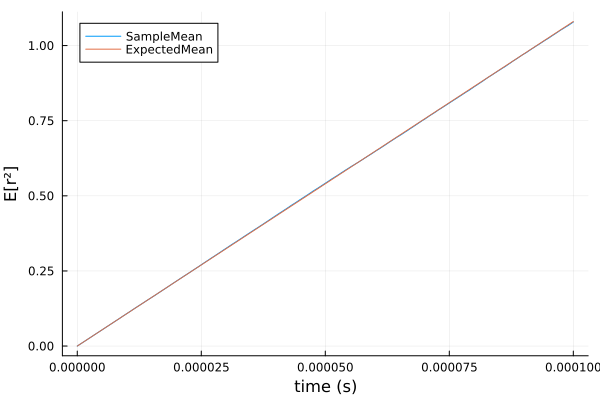

In [2]:
particle = zeros(NParticles,3)
Avg_Distance² = zeros(NSteps+1)

# Simulate particle through the time
for (i,t) in enumerate(Time) 
    Avg_Distance²[i] = sum(particle .^2)/NParticles;
    # |x|₂ = sqrt(2 * D * dt) avg axis Displacement per step
    particle = particle + (sqrt(2*D*dt)) .* randn(NParticles,3);
end

# According to slide Avg_Distance² = 6 D t
Plots.plot(Time, Avg_Distance²,label="SampleMean", ylabel = "E[r²]",xlabel = "time (s)")
Plots.plot!(Time, 6 * D .* Time ,label="ExpectedMean")

##### 2. Simulate constant step size

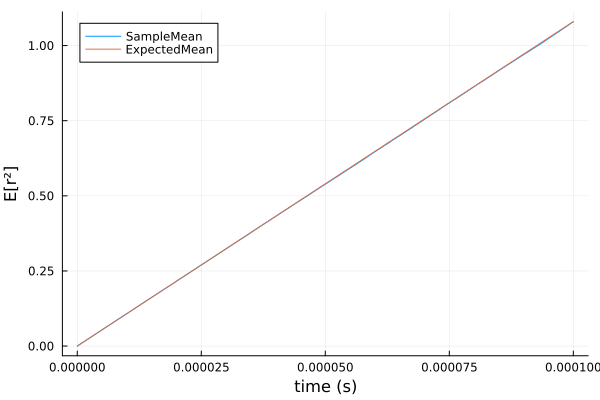

In [3]:
function random_direction(size)
    ϕ = rand(Uniform(0,2π))
    cosθ = rand(Uniform(-1,1))
    θ = acos( cosθ )
    return(size .* [sin(θ) * cos(ϕ); sin(θ) * sin(ϕ); cos(θ)])
end

particle = zeros(NParticles,3)
Avg_Distance² = zeros(NSteps+1)

# Simulate particle through the time
for (i,t) in enumerate(Time) 
    Avg_Distance²[i] = sum(particle .^2)/NParticles;
    # |x|₂ = sqrt(2 * D * dt) avg axis Displacement per step
    particle = particle + reduce(vcat,[random_direction(sqrt(6*D*dt))' for p in 1:NParticles]);
end

# According to slide Avg_Distance² = 6 D t
Plots.plot(Time, Avg_Distance²,label="SampleMean", ylabel = "E[r²]",xlabel = "time (s)")
Plots.plot!(Time, 6 * D .* Time ,label="ExpectedMean")

We can see that both simulation generated the same $\mathbb{E}[r²]$